# Thaiwan

## 1) Data Cleaning


In [1]:
# 1- importation des bibliothéques pour la manipulation et la visualisation des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

help(pd.read_excel)

In [2]:
# 2- Importation de la base Bank of thaiwan
tai=pd.read_excel("default of credit card clients.xls",index_col=0,skiprows=1)

In [3]:
# Affichage de premier 5 client
tai.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Afficher le nombre de chaque type de clients
tai["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [5]:
#Affichage de dimension du Dataframe
tai.shape

(30000, 24)

In [6]:
#la suppression des données manquants

tai5=tai.dropna()
data_propre=tai.dropna()
tai5.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


## feature engineering 

In [7]:
#Regroupement des variables bill,paid et pay
bill = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paid = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay = ['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [8]:
#Afficher le nombre de chaque valeur dans Feature "EDUCATION"
tai5.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
#Afficher le nombre de chaque valeur dans Feature "EDUCATION"
tai5.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
#Remplacer les variable non attendues dans les deux colonnes "EDUCATION" et "MARIAGE"    
fil = (tai5.EDUCATION == 5) | (tai5.EDUCATION == 6) | (tai5.EDUCATION == 0)
tai5.loc[fil, 'EDUCATION'] = 4

fil1 = (tai5.MARRIAGE== 0)
tai5.loc[fil1, 'MARRIAGE'] = 3

In [11]:
tai5.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [12]:
#Affichage des colonnes de dataframe tai
tai.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
#Faire centrer et réduire les valeurs des données tai5
col_to_norm = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
tai5[col_to_norm] = tai5[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [14]:
tai5.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,2,2,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
2,-0.365981,2,2,2,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1


In [15]:
tai5.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

## Analyse descriptive des données

In [16]:
#Réaliser une analyse descriptive
data_propre.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
#Tester la variation entre la moyenne et la médiane
abs(   (data_propre.mean() - data_propre.median()) / (data_propre.mean()) )*100

LIMIT_BAL                      16.410087
SEX                            24.709012
EDUCATION                       7.925316
MARRIAGE                       28.877051
AGE                             4.186217
PAY_0                         100.000000
PAY_2                         100.000000
PAY_3                         100.000000
PAY_4                         100.000000
PAY_5                         100.000000
PAY_6                         100.000000
BILL_AMT1                      56.306043
BILL_AMT2                      56.892235
BILL_AMT3                      57.270470
BILL_AMT4                      55.962318
BILL_AMT5                      55.088388
BILL_AMT6                      56.083800
PAY_AMT1                       62.920983
PAY_AMT2                       66.070858
PAY_AMT3                       65.554732
PAY_AMT4                       68.918854
PAY_AMT5                       68.746013
PAY_AMT6                       71.239588
default payment next month    100.000000
dtype: float64

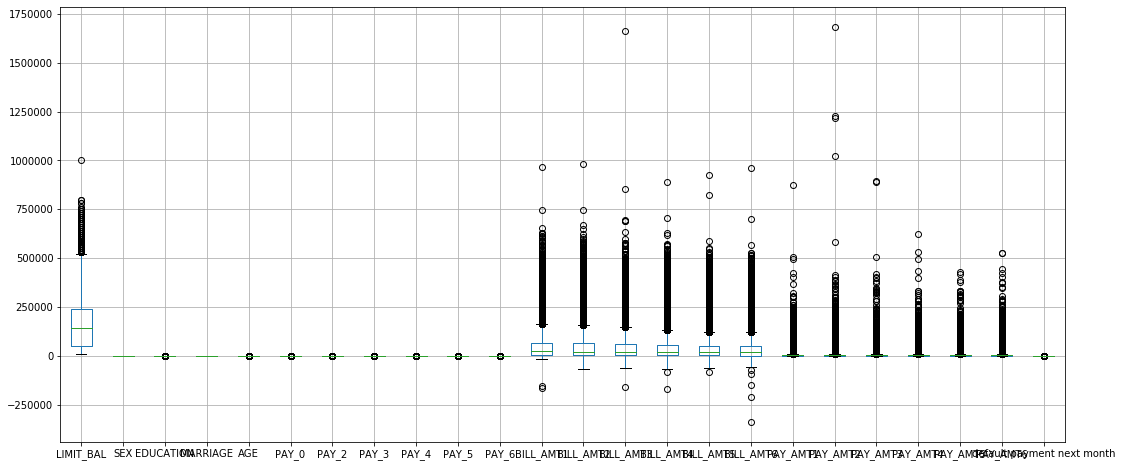

In [18]:
# Visualiser les points abérants
data_propre.boxplot(figsize=(18,8));

In [19]:
# limiter 3 chiffres aprés la vigule
pd.options.display.float_format = '{:,.3f}'.format

In [20]:
# Affichage de la corrélation entre les variables
data_propre.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000,0.025,-0.219,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,...,0.294,0.296,0.290,0.195,0.178,0.210,0.203,0.217,0.220,-0.154
SEX,0.025,1.000,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.060,-0.055,...,-0.022,-0.017,-0.017,-0.000,-0.001,-0.009,-0.002,-0.002,-0.003,-0.040
EDUCATION,-0.219,0.014,1.000,-0.143,0.175,0.105,0.122,0.114,0.109,0.098,...,-0.000,-0.008,-0.009,-0.037,-0.030,-0.040,-0.038,-0.040,-0.037,0.028
MARRIAGE,-0.108,-0.031,-0.143,1.000,-0.414,0.020,0.024,0.033,0.033,0.036,...,-0.023,-0.025,-0.021,-0.006,-0.008,-0.004,-0.013,-0.001,-0.007,-0.024
AGE,0.145,-0.091,0.175,-0.414,1.000,-0.039,-0.050,-0.053,-0.050,-0.054,...,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
PAY_0,-0.271,-0.058,0.105,0.020,-0.039,1.000,0.672,0.574,0.539,0.509,...,0.179,0.181,0.177,-0.079,-0.070,-0.071,-0.064,-0.058,-0.059,0.325
PAY_2,-0.296,-0.071,0.122,0.024,-0.050,0.672,1.000,0.767,0.662,0.623,...,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.264
PAY_3,-0.286,-0.066,0.114,0.033,-0.053,0.574,0.767,1.000,0.777,0.687,...,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.046,-0.036,-0.036,0.235
PAY_4,-0.267,-0.060,0.109,0.033,-0.050,0.539,0.662,0.777,1.000,0.820,...,0.246,0.243,0.239,-0.009,-0.002,-0.069,-0.043,-0.034,-0.027,0.217
PAY_5,-0.249,-0.055,0.098,0.036,-0.054,0.509,0.623,0.687,0.820,1.000,...,0.272,0.270,0.263,-0.006,-0.003,0.009,-0.058,-0.033,-0.023,0.204


<function matplotlib.pyplot.show(*args, **kw)>

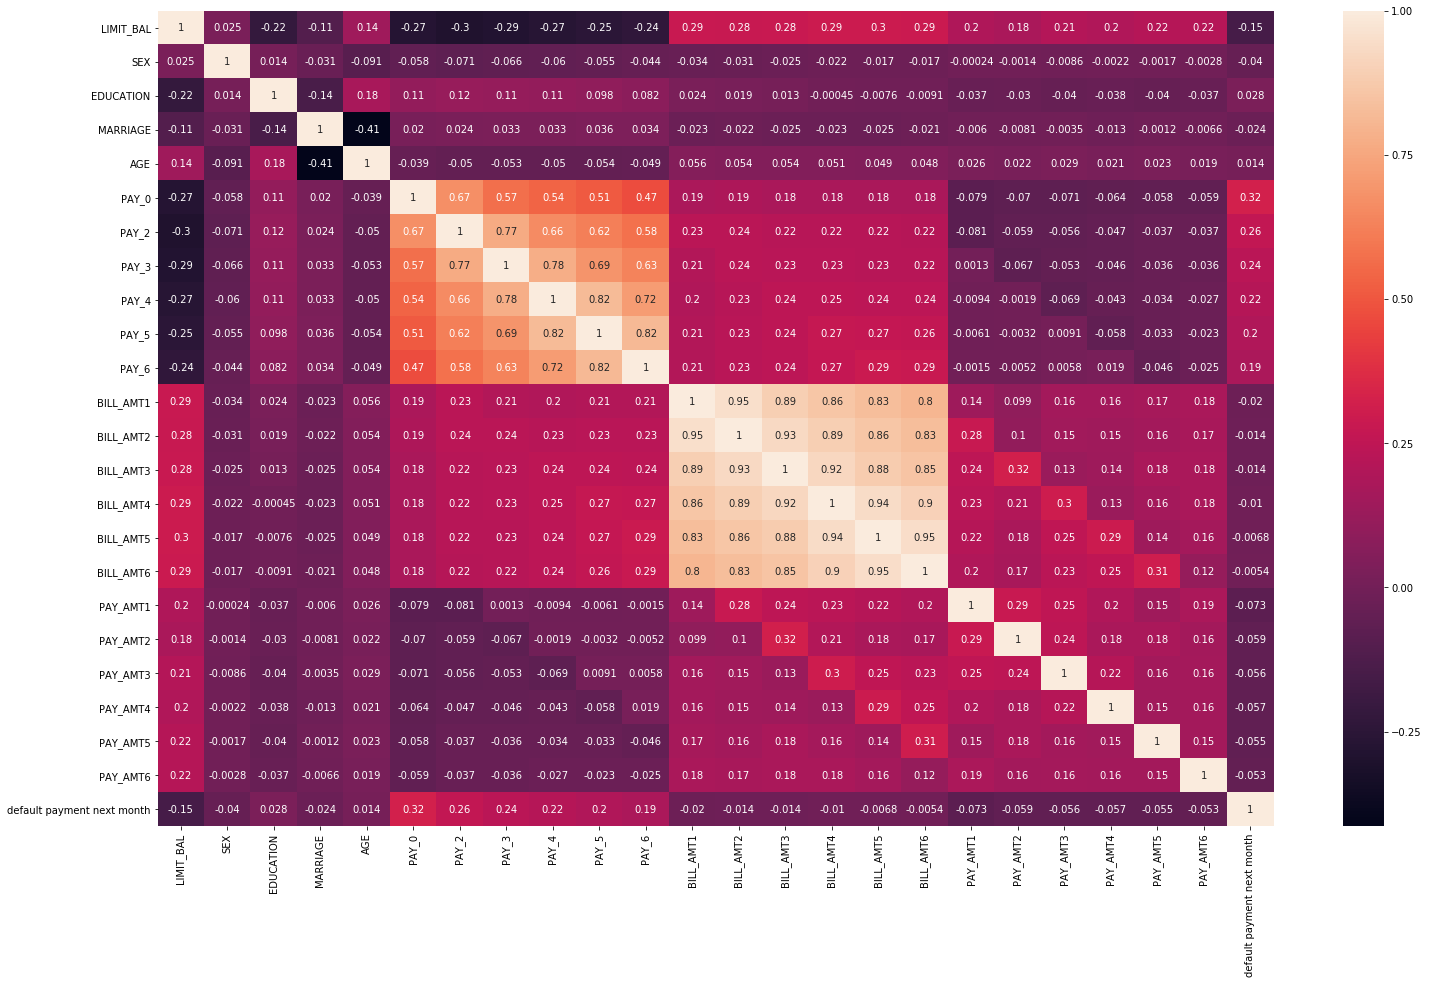

In [21]:
# Visualiser la corrélation enutilisant heatmap sans les variables encodées
plt.figure(figsize=(25,15))
sns.heatmap(data_propre.corr() , annot=True)
plt.show

# data Seslection 

#### 1) Méthode de KBest 

In [22]:
# Appliquer une fonction qui permet de la décomposition des données
# en train et test avec une division de 0.2
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]

    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
# Suppression de variable cible "default payment next month"
feature_cols = tai5.columns.drop('default payment next month')
train, valid, _ = get_data_splits(tai5)

# Appliquer la méthode "SelectKBest" en gardant que les 8 colonnes qui expliquent l'information le mieux

selector = SelectKBest(f_classif, k=8)

X_new = selector.fit_transform(train[feature_cols], train['default payment next month'])
X_new

array([[-1.13672015,  2.        ,  2.        , ..., -2.        ,
        -2.        , -0.34194162],
       [-0.3659805 , -1.        ,  2.        , ...,  0.        ,
         2.        , -0.34194162],
       [-0.59720239,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.25029158],
       ...,
       [-1.21379411,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.26345344],
       [-1.13672015,  0.        ,  0.        , ...,  0.        ,
        -2.        , -0.1574944 ],
       [-0.52012843,  0.        , -1.        , ..., -1.        ,
         0.        , -0.27552855]])

In [24]:
# Afficher dans un dataframe les meilleurs colonnes  , les autres colonnes ont des valeurs de 0
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.137,0.000,0.000,0.000,0.000,2.000,2.000,-1.000,-1.000,-2.000,...,0.000,0.000,0.000,0.000,-0.342,0.000,0.000,0.000,0.000,0.000
2,-0.366,0.000,0.000,0.000,0.000,-1.000,2.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.342,0.000,0.000,0.000,0.000,0.000


In [25]:
#Garder que les colonnes qui ont des valeurs non nuls, on obtient alors que les meilleurs colonnes 
selected_columns = selected_features.columns[selected_features.var() != 0]


train[selected_columns].head(2)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1
ID,,,,,,,,
1,-1.137,2,2,-1,-1,-2,-2,-0.342
2,-0.366,-1,2,0,0,0,2,-0.342


### Méthode de L1regression

In [26]:
# Importer la classe "warnings" qui permet d'ignorer les erreurs de gravité "warnings"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# On fait la division des données
train, valid, _ = get_data_splits(tai5)

X1, y1 = train[train.columns.drop("default payment next month")], train['default payment next month']

# On choisit lasso-régression pour filtrer les colonnes
logistic = LogisticRegression(C=1, penalty="l1", random_state=7).fit(X1, y1)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X1)
X_new

array([[-1.13672015,  2.        ,  2.        , ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  2.        ,  2.        , ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  2.        ,  2.        , ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.21379411,  1.        ,  2.        , ..., -0.28763603,
        -0.19501098, -0.23713013],
       [-1.13672015,  1.        ,  4.        , ..., -0.24422965,
        -0.31413612, -0.29338206],
       [-0.52012843,  1.        ,  1.        , ..., -0.2761461 ,
        -0.24868274, -0.23713013]])

In [27]:
# Affichage des colonnes séléctionnés dans un dataframe
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X1.index,
                                 columns=X1.columns)
#Suppression des donneés qui ont des valeurs nuls
selected_columns = selected_features.columns[selected_features.var()!=0]

In [28]:
selected_columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [29]:
# Découpage des données en variables explicatives et variables expliquées
X = tai5.iloc[:,:23]  
y = tai5.iloc[:,23]    

In [30]:
X.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.137,2,2,1,24,2,2,-1,-1,-2,...,-0.668,-0.672,-0.663,-0.653,-0.342,-0.227,-0.297,-0.308,-0.314,-0.293
2,-0.366,2,2,2,26,-1,2,0,0,0,...,-0.639,-0.622,-0.606,-0.598,-0.342,-0.214,-0.240,-0.244,-0.314,-0.181


In [31]:
y.values

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
# Importer la classe StandardScaler pour l'échantionnage
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [33]:
# Appliquer la méthode pour le dataframe x des variables explicatives
ss.fit(X.values)
matriceTCL = ss.transform(X.values)
#Afficher les données aprés remise a l'echellle avec standarscaler
dataTCL =pd.DataFrame(matriceTCL , columns=X.columns)
dataTCL.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.137,0.810,0.212,-1.069,-1.246,1.795,1.782,-0.697,-0.667,-1.530,...,-0.668,-0.672,-0.663,-0.653,-0.342,-0.227,-0.297,-0.308,-0.314,-0.293
1,-0.366,0.810,0.212,0.849,-1.029,-0.875,1.782,0.139,0.189,0.235,...,-0.639,-0.622,-0.606,-0.598,-0.342,-0.214,-0.240,-0.244,-0.314,-0.181


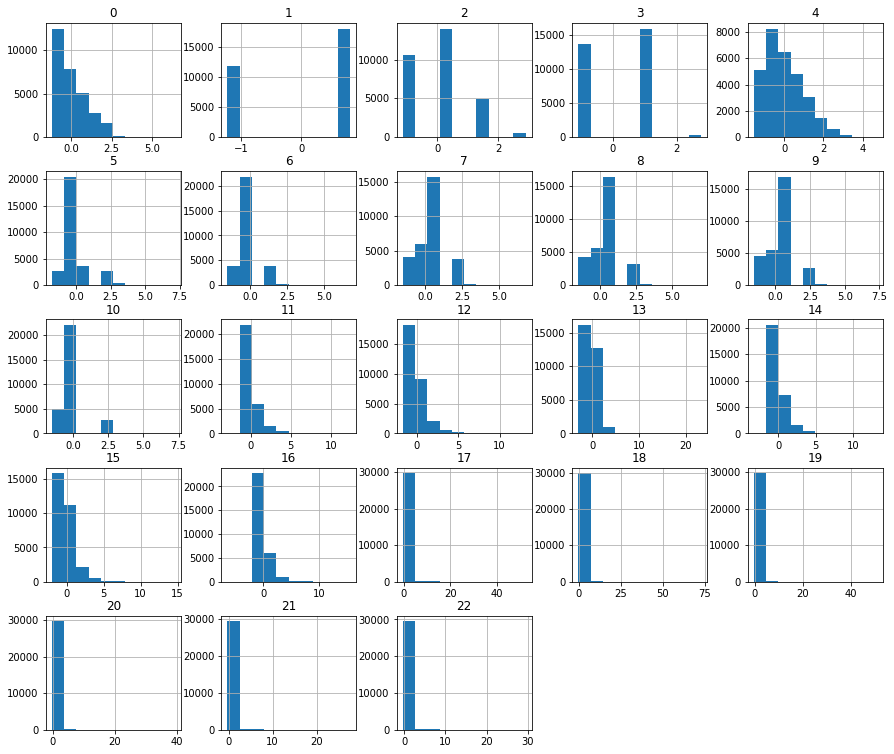

In [34]:
#Afficher la forme des données de chaque feature en utilisant "hist"
pd.DataFrame(matriceTCL).hist(figsize=(15,13));

### la méthode Feature Importance

In [35]:
# Importer la classe ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [36]:
#Diviser les données pour l'aprentissage et le test afin d'avoir une meilleur résultat
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
#Faire l'apprentissage des données en utilisant le model ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
#Afficher "feature_importances" pour chaque colonne
print(model.feature_importances_) 

[0.06438991 0.00992827 0.03258911 0.02407932 0.06583811 0.10671869
 0.04348884 0.03799117 0.03049977 0.02576331 0.02927704 0.05000222
 0.04458711 0.04517014 0.04455746 0.04464972 0.0438118  0.04357262
 0.04165814 0.0413776  0.04164117 0.04274789 0.04566061]


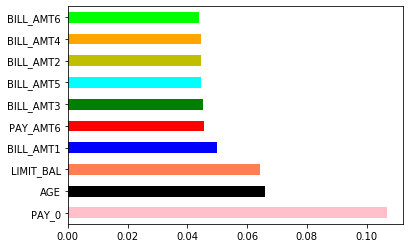

In [38]:
#Visualiser "feature_importance" dans un graphe
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh',color=['pink','black', 'coral', 'blue','red', 'green', 'cyan','y','orange','lime'])
plt.show()

### Méthode de PCA

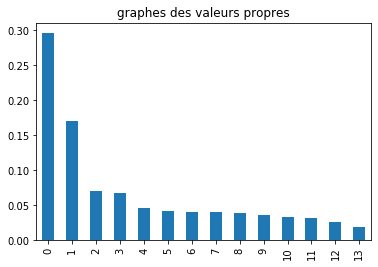

array([0.29630489, 0.17058497, 0.07048544, 0.06667991, 0.04627074,
       0.04159677, 0.04044046, 0.03971385, 0.03919007, 0.03557567,
       0.03331129, 0.03092277, 0.02556333, 0.01835084])

In [39]:
# Importer la classe de PCA
from sklearn.decomposition import PCA
#initialiser la méthode PCA
pca = PCA(0.95)

# fit and transform les données explicatives seulement
datapca = pca.fit(dataTCL.iloc[:,1:])
# Afficher les pourcentages de variance expliquée de chaque feature
val = pd.Series(datapca.explained_variance_ratio_)
val.plot(kind='bar', title="graphes des valeurs propres")
plt.show()
#  Création d'un dataframe qui contient les valeurs de chaque composants 
# Initiation pour afficher la cercle de corrélation
coef = np.transpose(pca.components_)
cols = ['PC-'+str(x) for x in range(len(val))]
pc_infos = pd.DataFrame(coef, columns=cols, index=dataTCL.iloc[:,1:].columns)
pca.n_components_
datapca.explained_variance_ratio_

Text(0.5, 1.0, 'Circle of Correlations')

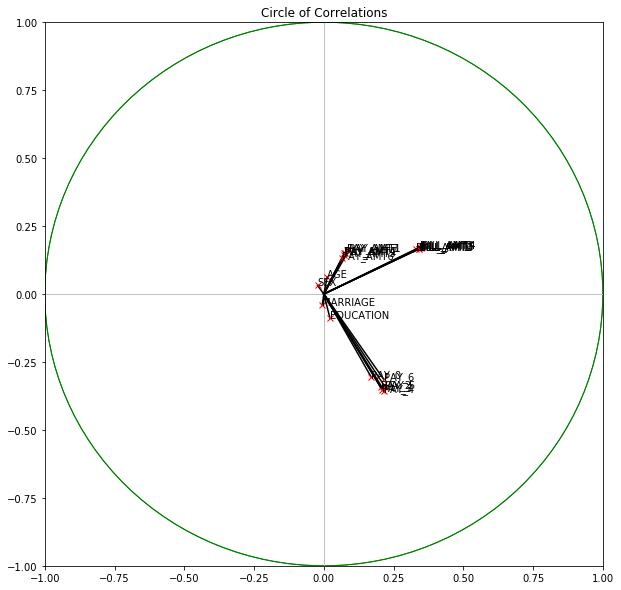

In [40]:
# Affichage de la cercle de corrélation
# Réalisation d'un graphe qui contient un cercle
plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["PC-0"])):
    x = pc_infos["PC-0"][idx]
    y = pc_infos["PC-1"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")

##### Aprés la visualisation de la  corrélation entre les Features et l'étape Feature Selection, nous avons conclus que les features qui expriment bien la variable cible sont :
####  'LIMIT_BAL','PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'

## Modeling

In [41]:
tai5.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [70]:
clos=['LIMIT_BAL', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
tai5[clos].head(2)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,,
1,-1.137,2,2,-1,-1,-2,-2
2,-0.366,-1,2,0,0,0,2


In [71]:
y = tai5.iloc[:,23] 

In [72]:
y.values

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
#Diviser les données pour l'apprentissage et le test
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(tai5[clos].values,y.values , test_size = 0.2,random_state=0)

Text(0, 0.5, 'Erreur')

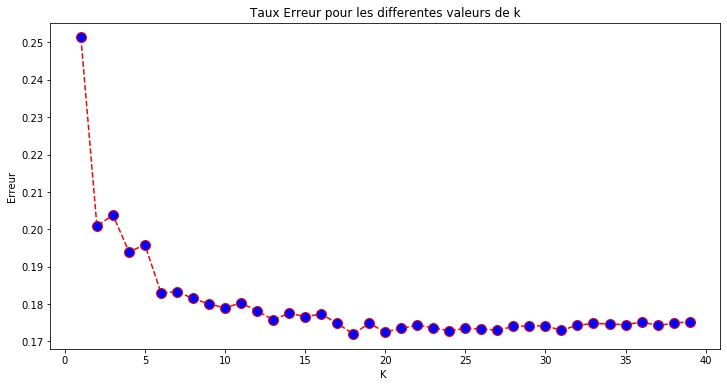

In [74]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train1, y_train1)
    pred_i = knn_model.predict(X_test1)
    error.append(np.mean(pred_i != y_test1))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# Appliquer la meilleur valeur de k=2
knn1 = KNeighborsClassifier(28)
# Faire l'étape d'apprentissage  
knn_model1 = knn.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_knn1 =knn_model1.predict(X_test1)
# Afficher l'accuracy de prédiction
knn_score=knn_model1.score(X_test1,y_test1)
knn_score

0.8246666666666667

In [76]:
# Importer la classe accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred_knn1))

0.8246666666666667


In [77]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_knn1))

[[4481  222]
 [ 830  467]]


In [78]:
#Afficher "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_knn1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.68      0.36      0.47      1297

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



## 1- DecisionTreeClassifier

In [79]:
#Importer la classe "DecisionTreeClassifier"
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# Faire l'étape d'apprentissage  
dtc_model = DecisionTreeClassifier().fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_dtc = dtc_model.predict(X_test1)
# Afficher l'accuracy de prédiction
dtc_score=dtc_model.score(X_test1,y_test1)
dtc_score

0.8038333333333333

In [80]:
# Importer la classe accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred_dtc))

0.8038333333333333


In [81]:
#Afficher "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4703
           1       0.58      0.35      0.44      1297

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.66      6000
weighted avg       0.78      0.80      0.79      6000



## 2- RandomForestClassifier


In [82]:
#Importer la classe "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=30,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)
# Faire l'étape d'apprentissage  
rfc_model = rfc.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_rfc = rfc_model.predict(X_test1)
# Afficher l'accuracy de prédiction
rfc_score=rfc_model.score(X_test1,y_test1)
rfc_score

0.8083333333333333

In [83]:
# Importer la classe accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred_rfc))

0.8083333333333333


In [84]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_rfc))

[[4356  347]
 [ 803  494]]


In [85]:
#Afficher "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4703
           1       0.59      0.38      0.46      1297

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



## Logistic Regression

In [86]:
#Importer la classe "LogisticRegression"
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Faire l'étape d'apprentissage  
lr_model = lr.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_lr = lr_model.predict(X_test1)
# Afficher l'accuracy de prédiction
lr_score=lr_model.score(X_test1,y_test1)
lr_score

0.8158333333333333

In [87]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_lr))

[[4607   96]
 [1009  288]]


In [88]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4703
           1       0.75      0.22      0.34      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.60      0.62      6000
weighted avg       0.81      0.82      0.77      6000



In [ ]:
#Tester la prédiction d'un nouveau donnée
df = np.array([20000,2,2,1,24,2,2,-1,-1,-1,-1,3919,3102,689,0,0,0,0,689,0,0,0,0]).reshape(1,23)
df2 = np.array([20000,2,2,2,4,6,1]).reshape(1,7)
lr_model.predict(df2)

In [90]:
y_pred_lr

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Naive Bayes

In [91]:
#Importer la classe "GaussianNB"
from sklearn.naive_bayes import GaussianNB
model_NB= GaussianNB()
# Faire l'étape d'apprentissage  
model_naive=model_NB.fit(X_train1,y_train1)
# réaliser la prédiction de X_test1
y_pred_nb =model_naive.predict(X_test1)
# Afficher l'accuracy de prédiction
nb_score=model_naive.score(X_test1,y_test1)
nb_score

0.8061666666666667

In [92]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_nb))

[[4316  387]
 [ 776  521]]


In [93]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4703
           1       0.57      0.40      0.47      1297

    accuracy                           0.81      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



## 3) Support Vector Machine

In [94]:
#Importer la classe "SVC"
from sklearn.svm import SVC
model_svm= SVC(gamma='auto',C= 20, kernel='rbf')
# Faire l'étape d'apprentissage 
model_svm1=model_svm.fit(X_train1,y_train1)
# réaliser la prédiction de X_test1
y_pred_svm = model_svm.predict(X_test1)
# Afficher l'accuracy de prédiction
svm_score=model_svm1.score(X_test1,y_test1)
svm_score

0.8245

In [95]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_svm))

[[4478  225]
 [ 828  469]]


In [96]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.68      0.36      0.47      1297

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [ ]:
#Tester la prédiction d'un nouveau donnée
df = np.array([210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,23)
df2 = np.array([20000,2,2,2,4,6,1]).reshape(1,7)


model_svm1.predict(df2)

## 4) XGBOOST

In [ ]:
#Importer la classe "XGBClassifier"
from xgboost import XGBClassifier
model_xgboost= XGBClassifier()
# Faire l'étape d'apprentissage 
model_xgboost.fit(X_train1,y_train1)
# réaliser la prédiction de X_test1
y_pred_xgb = model_xgboost.predict(X_test1)
# Afficher l'accuracy de prédiction
model_xgboost.score(X_test1,y_test1)

In [ ]:
xgb_score=model_xgboost.score(X_test1,y_test1)
xgb_score

In [ ]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_xgb))

In [ ]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_xgb))

In [ ]:
#Tester la prédiction d'un nouveau donnée
df = np.array([20000,2,2,1,24,2,2,-1,-1,-1,-1,3919,3102,689,0,0,0,0,689,0,0,0,0]).reshape(1,23)
df2 = np.array([20000,2,2,2,4,6,1]).reshape(1,7)
model_xgboost.predict(df2)

## ADABOOST

In [74]:
#Importer la classe "AdaBoostClassifier"
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=500, learning_rate=0.8)
# Faire l'étape d'apprentissage 
model_ada.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_ada = model_ada.predict(X_test1)
model_ada.score(X_test1,y_test1)
# Afficher l'accuracy de prédiction
ada_score=model_ada.score(X_test1,y_test1)
ada_score

0.8275

In [75]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_ada))

[[4488  215]
 [ 820  477]]


In [76]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4703
           1       0.69      0.37      0.48      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



In [77]:
#Tester la prédiction d'un nouveau donnée
df = np.array([20000,2,2,1,24,2,2,-1,-1,-1,-1,3919,3102,689,0,0,0,0,689,0,0,0,0]).reshape(1,23)
df2 = np.array([20000,2,2,2,4,6,1]).reshape(1,7)
model_ada.predict(df)

array([1], dtype=int64)

In [78]:
### Courbe ROC de différents modéle

In [79]:
#Importer les méthodes "roc_curve, auc"
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [80]:
# Création d'un tuple qui contient false positive rate, trus positive rate 
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test1, y_pred_knn1)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test1, y_pred_svm)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test1, y_pred_xgb)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test1, y_pred_ada)
roc_auc6= auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test1, y_pred_lr)
roc_auc7= auc(fpr7, tpr7)
fpr8, tpr8, threshold8 = roc_curve(y_test1, y_pred_nb)
roc_auc8= auc(fpr8, tpr8)

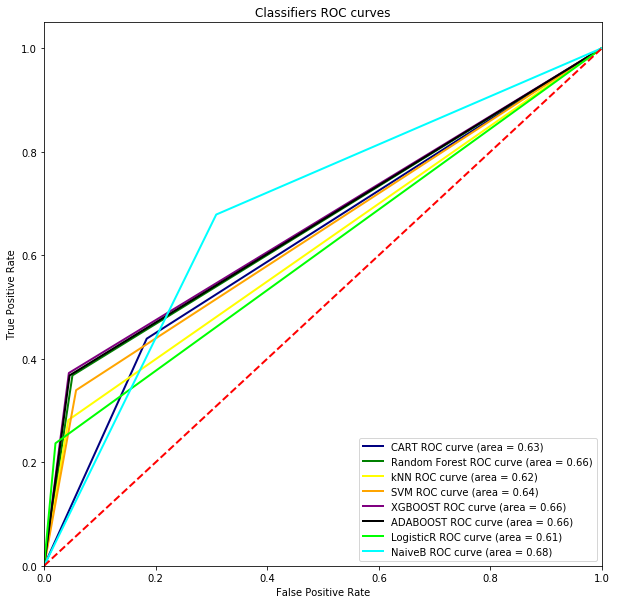

In [81]:
plt.figure(figsize=(10,10)) 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='orange', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='purple', lw=2, label='XGBOOST ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='ADABOOST ROC curve (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='lime', lw=2, label='LogisticR ROC curve (area = %0.2f)'% roc_auc7)
plt.plot(fpr8, tpr8, color='cyan', lw=2, label='NaiveB ROC curve (area = %0.2f)'% roc_auc8)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [82]:
# Création de fichier pickle  contient les models traités au-dessus
import pickle
with open('taiwan_final.pkl','wb') as file:
    pickle.dump([knn_model1,dtc_model,rfc_model,lr_model,model_naive,model_svm1,model_xgboost,model_ada],file)

In [83]:
# Création de fichier pickle contient false positive rate, true positive rate et roc_auc
import pickle
with open('taiwan_final_roc.pkl','wb') as file:
    pickle.dump([fpr1, tpr1,roc_auc1,fpr2, tpr2,roc_auc2,fpr3, tpr3,roc_auc3,fpr4, tpr4,roc_auc4,fpr5, tpr5,roc_auc5,fpr6, tpr6,roc_auc6,fpr7, tpr7,roc_auc7,fpr8, tpr8,roc_auc8],file)

In [84]:
# Création de fichier pickle contient le score de chaque modéle traité
import pickle
with open('taiwan_final_score.pkl','wb') as file:
    pickle.dump([knn_score,dtc_score,rfc_score,lr_score,nb_score,svm_score,xgb_score,ada_score],file)

In [85]:
#ouvrir un fichier pickle
with open('taiwan_final.pkl','rb') as f:
    ma= pickle.load(f)
ma[0]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

## Les modéles non Supervisé de clustering 

### Kmeans

3214024.3877333417
1444557.4166873975
1039167.3215751157
888594.5424661534
811197.5655289374
753613.988177984
709120.4760735685
675033.9052442594
647995.9570332454


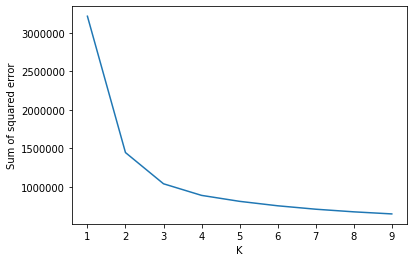

In [87]:
# Importer la classe kmeans
from sklearn.cluster import KMeans
#Utilise la méthode elbow pour connaitre la meilleur valeur de k
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    print (km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [88]:
#Appliquer la méthode Kmeans pour k=2
Model1 = KMeans(n_clusters=2)
Model1.fit(data_propre.iloc[:,1:])
Model1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
#faire identifier la classe de chaque valeur en utilisant crosstab
pd.crosstab(y,Model1.labels_)

col_0,0,1
default payment next month,,
0,20069,3295
1,5811,825


In [93]:
## CAH

In [95]:
#Importer la classe CAH
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
# Faire la liaison entre tous les données en utilisant la fonction linkage()
Z= linkage(X,method='ward',metric='euclidean')

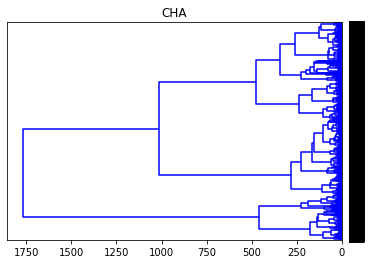

In [98]:
plt.title("CHA") 
#Afficher la liaison obtenu avec dendogramme
dendrogram(Z,labels=X.index,orientation='left',color_threshold=0) 
plt.show()

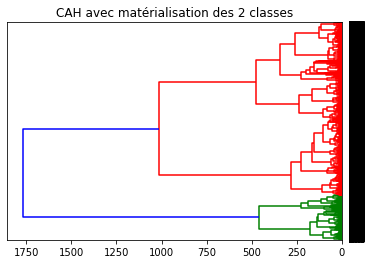

In [100]:
# Choisir un threshhold qui permet de diviser les données en deux classes
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=X.index,orientation='left',color_threshold=1500
          ) 
plt.show()

In [101]:
#Appliquer la ségmentation en utilisant fcluster
clusters = fcluster(Z,criterion='distance', t=1500)

In [103]:
#faire identifier la classe de chaque valeur en utilisant crosstab
pd.crosstab(y,clusters)

col_0,1,2
default payment next month,,
0,4680,18684
1,1516,5120


## DBSCAN

In [108]:
# Importer la classe DBSCAN,metric
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 

  
# Appliquer DBSCAN 
db = DBSCAN(eps=0.3, min_samples=10).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Identifier le nombre de clusters   
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [114]:
X.values

array([[-1.13672015,  2.        ,  2.        , ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  2.        ,  2.        , ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  2.        ,  2.        , ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618,  1.        ,  2.        , ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636,  1.        ,  3.        , ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825,  1.        ,  2.        , ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [115]:
#Appliquer DBSCAN au données échantilooné
DBSCANModel = DBSCAN(metric='euclidean',eps=0.25,min_samples=10,algorithm='auto').fit(X.values)
DBSCANModel

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)